# Areas geojson

In [1]:
using GeoJSON, GLMakie, GeoMakie, Makie

In [2]:
path = "./data/areas_geojson/areas_psmb.geojson"
areas = GeoJSON.read(read(path))

path = "./data/LosLagos.geojson"
los_lagos = GeoJSON.read(read(path))

FeatureCollection with 30 Features


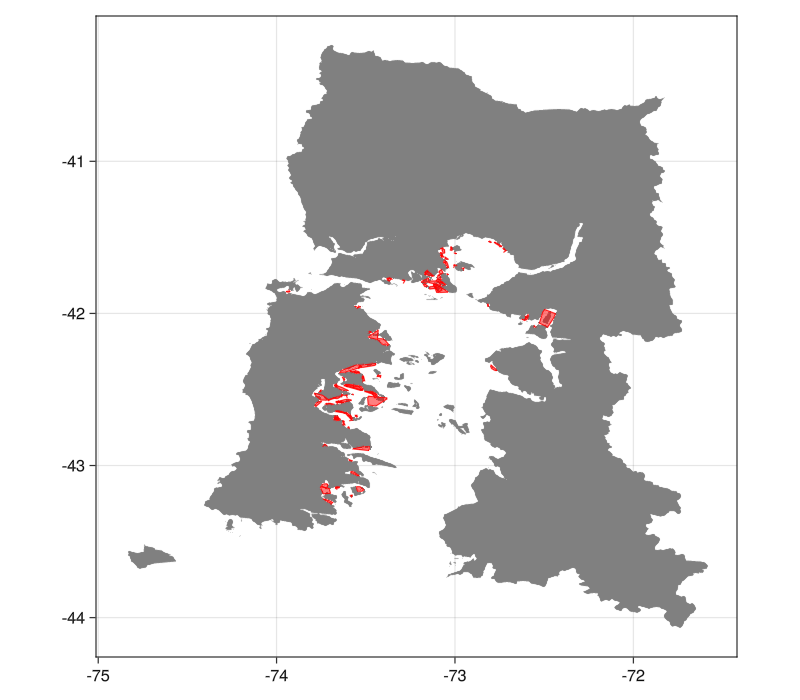

In [3]:
fig = Figure(resolution = (800, 700))
Axis(fig[1, 1],aspect=1)

poly!(los_lagos, color=:gray)
poly!(areas, color=RGBAf(1,0,0,.5), strokecolor=:red, strokewidth=1) 
fig

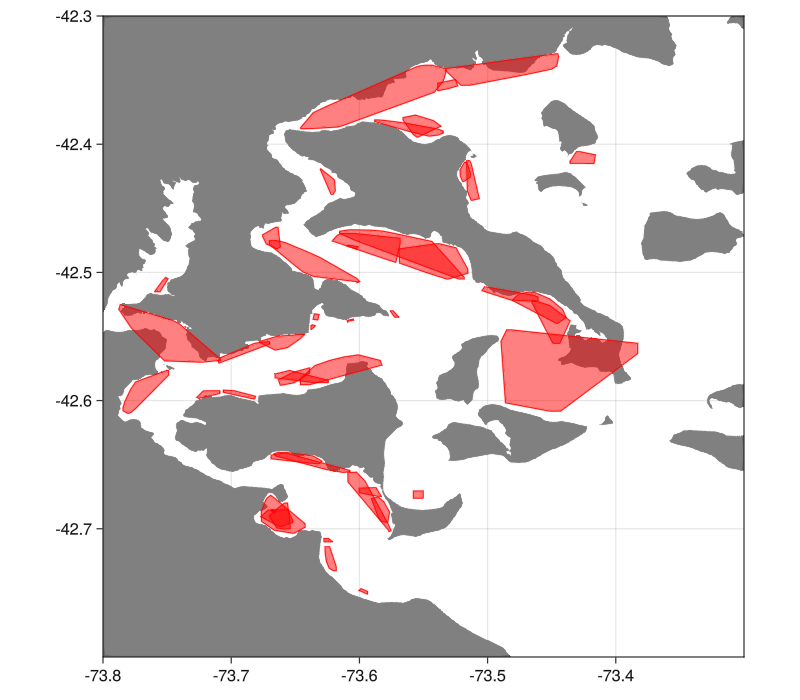

In [4]:
fig = Figure(resolution = (800, 700))
Axis(fig[1, 1],aspect=1)

poly!(los_lagos, color=:gray)
poly!(areas, color=RGBAf(1,0,0,.5), strokecolor=:red, strokewidth=1) 

corner = (-73.8,-42.8)
side = .5

xlims!(corner[1], corner[1]+side)
ylims!(corner[2], corner[2]+side)

fig

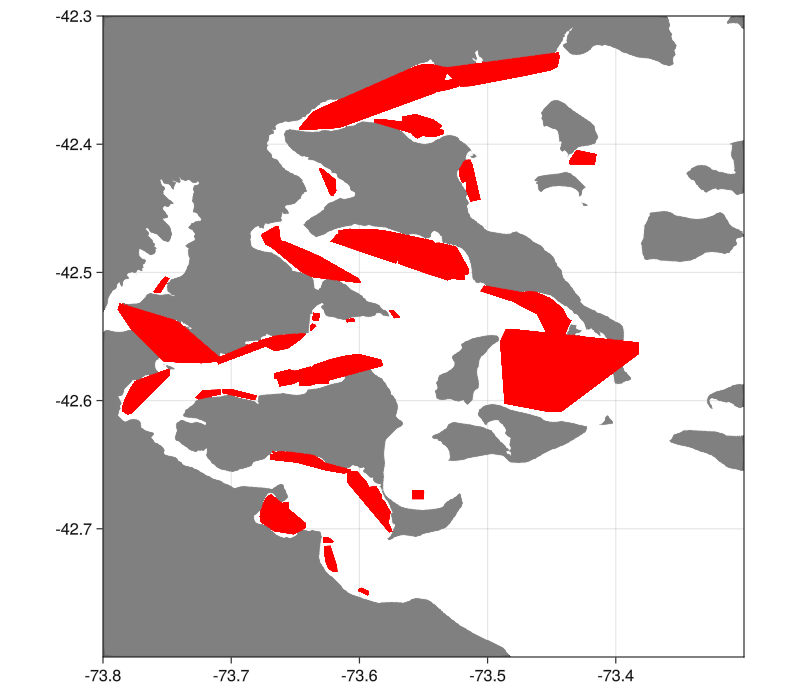

In [5]:
path = "./data/areas_geojson/areas_psmb_disueltas.geojson"
areas_disueltas = GeoJSON.read(read(path))


fig = Figure(resolution = (800, 700))
Axis(fig[1, 1],aspect=1)

poly!(los_lagos, color=:gray)
corner = (-73.8,-42.8)
side = .5
xlims!(corner[1], corner[1]+side)
ylims!(corner[2], corner[2]+side)

poly!(areas_disueltas, color=RGBAf(1,0,0,.5), strokecolor=:red, strokewidth=1) 

fig

644


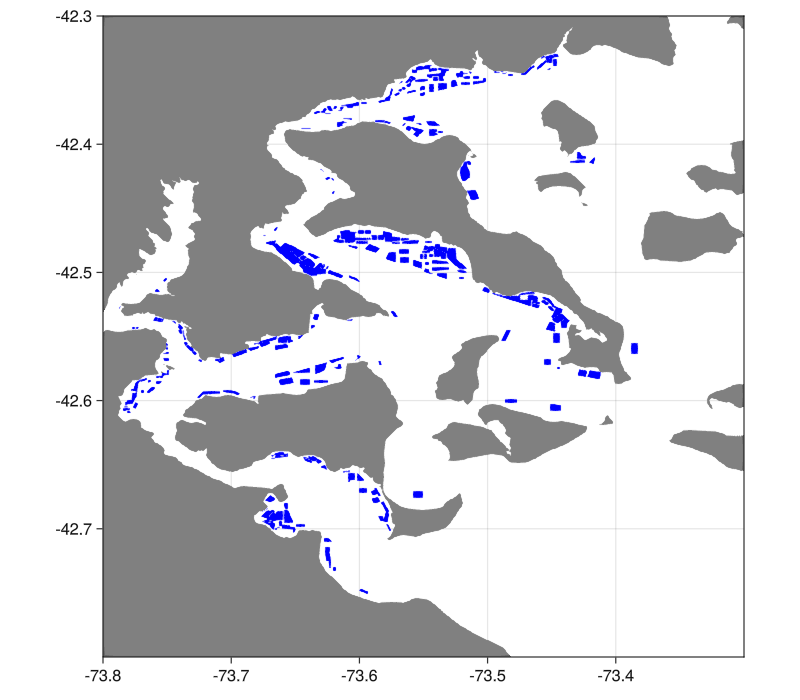

In [6]:
path = "./data/areas_geojson/centros_psmb.geojson"
centros = GeoJSON.read(read(path))
println(length(centros))

fig = Figure(resolution = (800, 700))
Axis(fig[1, 1],aspect=1)

poly!(los_lagos, color=:gray)
corner = (-73.8,-42.8)
side = .5
xlims!(corner[1], corner[1]+side)
ylims!(corner[2], corner[2]+side)

poly!(centros, color=:blue, strokewidth=0) 

fig

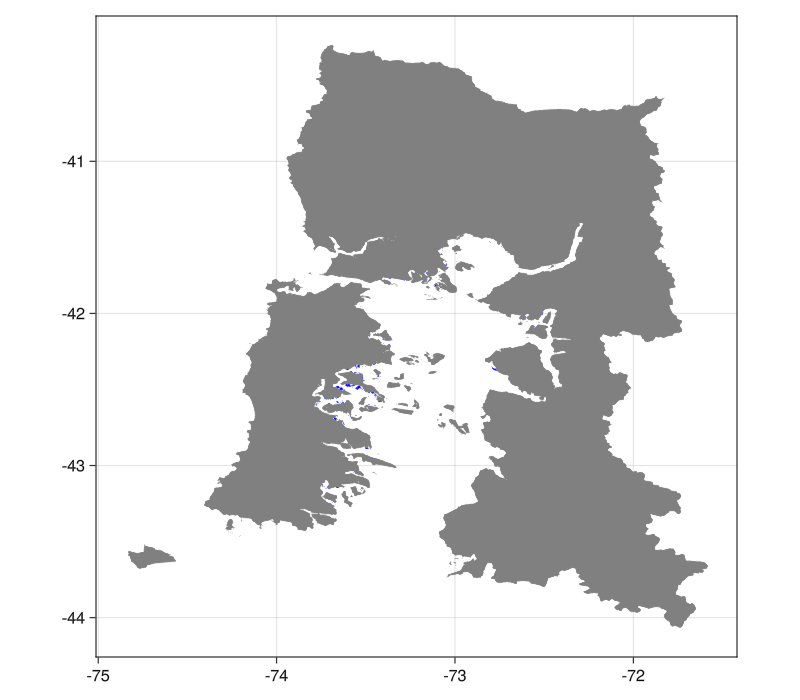

In [7]:
fig = Figure(resolution = (800, 700))
Axis(fig[1, 1],aspect=1)

poly!(los_lagos, color=:gray)
poly!(centros, color=:blue, strokewidth=0) 

fig

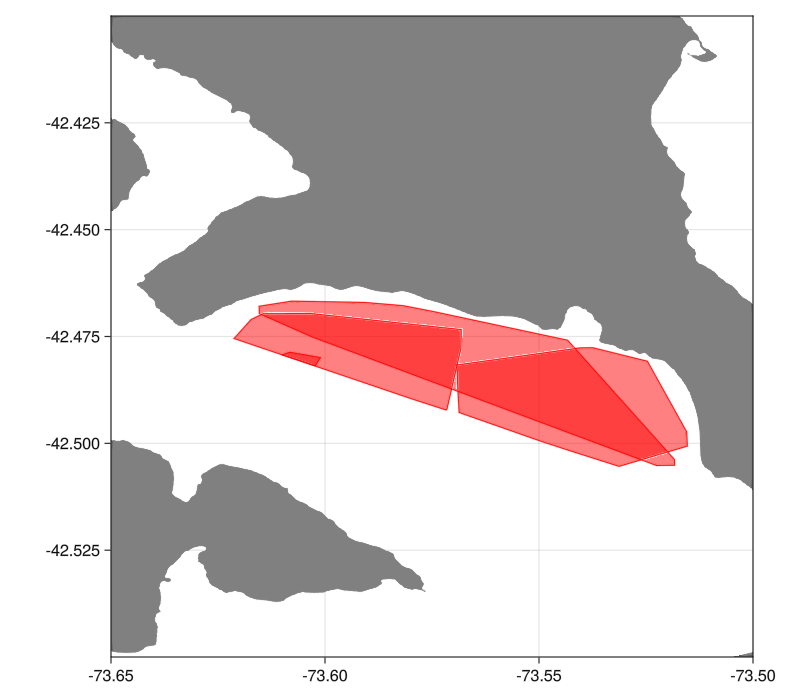

In [8]:
fig = Figure(resolution = (800, 700))
Axis(fig[1, 1],aspect=1)

corner = (-73.65,-42.55)
side = .15
xlims!(corner[1], corner[1]+side)
ylims!(corner[2], corner[2]+side)

poly!(los_lagos, color=:gray)

for k in [46,51,64,66] # izq der chi gra
    POL = [(areas.geometry[k][1][1][i][1],areas.geometry[k][1][1][i][2]) for i in 1:length(areas.geometry[k][1][1])]
    poly!(POL, color=RGBAf(1,0,0,.5), strokecolor=:red, strokewidth=1) 
end

fig

---
# Areas agregadas via DBScan 
(hecho por Matias el 31 May 2023 usando: https://postgis.net/docs/ST_ClusterDBSCAN.html)

In [9]:
path = "./data/clusters_centros_psmb/clusters_centros.geojson"
clusters = GeoJSON.read(read(path))

path = "./data/clusters_centros_psmb/centros_con_cluster.geojson"
centros_con_cluster = GeoJSON.read(read(path))

FeatureCollection with 644 Features


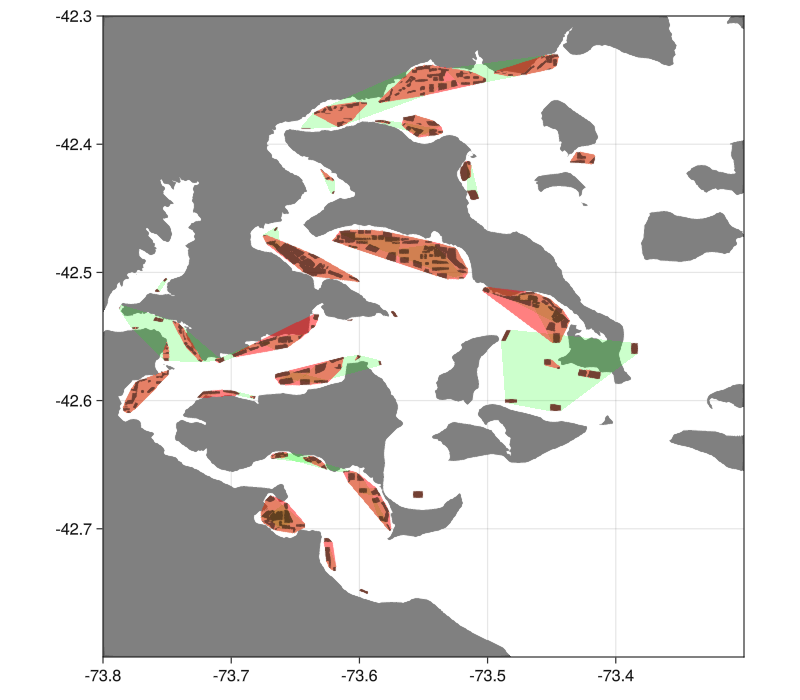

In [10]:
fig = Figure(resolution = (800, 700))
Axis(fig[1, 1],aspect=1)

poly!(los_lagos, color=:gray)
poly!(areas, color=RGBAf(0,1,0,.2), strokecolor=:transparent, strokewidth=1) 
poly!(clusters, color=RGBAf(1,0,0,.5), strokecolor=:transparent, strokewidth=1) 
poly!(centros_con_cluster, color=RGBAf(0,0,0,.5), strokecolor=:transparent, strokewidth=1) 


corner = (-73.8,-42.8)
side = .5

xlims!(corner[1], corner[1]+side)
ylims!(corner[2], corner[2]+side)

fig

In [24]:
using DataFrames
using CSV
df = DataFrame(id_centro=Int64.(centros.codigocentro), id_area_OLD=Int64.(centros.codigoarea), id_cluster_NEW=Int64.(centros_con_cluster.cluster_id))
CSV.write("/data/id_areas_dbscan.csv", df)

LoadError: ArgumentError: Package CSV not found in current path.
- Run `import Pkg; Pkg.add("CSV")` to install the CSV package.

In [ ]:
import Pkg; Pkg.add("CSV")

    Updating registry at `C:\Users\Usuario\.julia\registries\General.toml`
   Resolving package versions...
   Installed WeakRefStrings ── v1.4.2
   Installed WorkerUtilities ─ v1.6.1
   Installed FilePathsBase ─── v0.9.20
